In [13]:
import logging
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import pandas as pd

In [25]:
logging.basicConfig(filename='AutoCaptcha.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')
EXPECTEDIMAGEWIDTH = 256

# Total dataset: 95,486

<AxesSubplot:title={'center':'Character Occurrance'}>

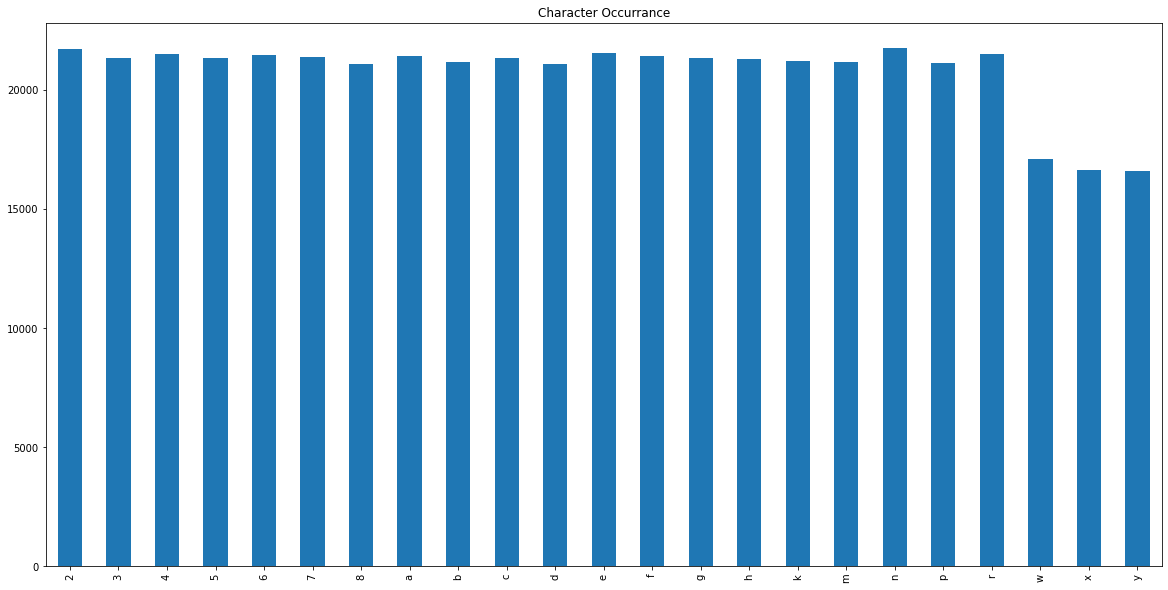

In [54]:
characterList = []
datasetPath = r"C:\Users\jaydu\Documents\Durham\Capstone Group 5\Auto Captcha\datasetImages\set6\captcha_images"
for root,dre, files in os.walk(datasetPath):
    # print("Total dataset",len(files))
    for name in files:
        characterList.extend(list(name.replace(".png","")))
df = pd.DataFrame({"characters":characterList})
characterData = df.characters.value_counts().sort_index()
characterData.plot.bar(title="Character Occurrance",figsize=(20,10))
#.reset_index()
#characterData.columns = ["character","count"]


In [63]:
characterData.to_csv("character.csv")

In [49]:
characterData.shape

(23,)

### Note: Many character are avoided by major technologies like BotDetect, because they can be eaily confused for each other
### For example (0,o),(1,i,j), etc....
#### Hence out of the expected 36 characters only 23 characters are present

# Image Pre Processing includes 
## 1) Thresholding images such that pixels above 75 are converted to 0 to make lines darker
## 2) Dilating the image is done to eliminate the distortion line
## 3) Eroding brings back the pixel thicknes
## 4) Sharpening makes the edges easier
## 5) Binary thresholding does is a final step before image segmentation

In [61]:
class AutoCaptcha:
    def __init__(self, imagePath=""):
        try:
            # use the image object for your operations
            self.imageObject = cv2.imread(imagePath)
            # self.imageObject = cv2.cvtColor(self.imageObject, cv2.COLOR_RGB2GRAY)
        except Exception as e:
            logging.exception("Exception Image constructor", exc_info=True)
            print(e)
    
    def ImageThresholding(self,thresholdType):
        try:
            ret,self.imageObject = cv2.threshold(self.imageObject,170,255,thresholdType)
        except Exception as e:
            logging.exception("Exception Image constructor", exc_info=True)
            print(e)

    def ImageShow(self):
        try:
            plt.imshow(self.imageObject)
            plt.show()
            #cv2.imshow('image', self.imageObject)
            #cv2.waitKey(0)
        except Exception as e:
            logging.exception("Exception Image Show", exc_info=True)
            # print(e)
        finally:
            pass

    def ImageWrite(self, writePath):
        try:
            cv2.imwrite(writePath, self.imageObject)
        except Exception as e:
            logging.exception("Exception Image Show", exc_info=True)
            print(e)

    def GrayUpScale(self):
        try:
            pass
            # scaling the image to expected width
            oldHeight, oldWidth, channels = self.imageObject.shape
            newWidth = EXPECTEDIMAGEWIDTH
            newHeight = int(newWidth * oldHeight / oldWidth)
            # reassigning the image with the gray scale version
            self.imageObject = cv2.cvtColor(self.imageObject, cv2.COLOR_BGR2GRAY)
            # reassigning the image with the scaled version
            self.imageObject = cv2.resize(self.imageObject, (newWidth, newHeight))
        except Exception as e:
            logging.exception("Exception GrayUpScale", exc_info=True)
            print(e)

    def Morphology(self):
        try:
            # defining kernel
            kernel = np.ones((2, 2), np.uint8)

            # eroding the image
            # self.imageObject = cv2.erode(self.imageObject, kernel, iterations=1)
            # dialtion Operation
            self.imageObject = cv2.dilate(self.imageObject, kernel, iterations=5)
            print("Post Dilation")
            self.ImageShow()
            sharpenFilter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
            self.imageObject = cv2.filter2D(self.imageObject, -1, sharpenFilter)
            self.imageObject = cv2.erode(self.imageObject, kernel, iterations=2)
            self.imageObject = cv2.dilate(self.imageObject, kernel, iterations=1)
            print("Post Erosion")
            self.ImageShow()
            # opening operation for noisy removal
            #self.imageObject = cv2.morphologyEx(self.imageObject, cv2.MORPH_OPEN, kernel)
            # closing operation for noisy removal
            #self.imageObject = cv2.morphologyEx(self.imageObject, cv2.MORPH_CLOSE, kernel)
            #print("Post Noise Removal")
            #self.ImageShow()
        except Exception as e:
            logging.exception("Exception Morphology", exc_info=True)
            print(e)

    def ImageSkeletonization(self):
        # Applying Zhang's thining algorithm on the image to eliminate distorting lines and pixels that are usual thinner than the character strokes
        self.imageObject = cv2.ximgproc.thinning(self.imageObject, cv2.ximgproc.THINNING_ZHANGSUEN)

    def preProcessing(self, wrt=""):
        print("Original Image")
        self.ImageShow()
        self.GrayUpScale()
        self.ImageThresholding(cv2.THRESH_TOZERO)
        print("Post thresholding")
        self.ImageShow()
        self.Morphology()
        self.ImageThresholding(cv2.THRESH_BINARY)
        
        # self.ImageSkeletonization()
        print("Final")
        self.ImageShow()
        # self.ImageShow()

        

Original Image


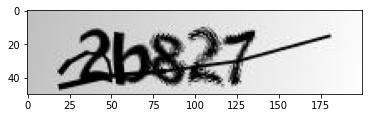

Post thresholding


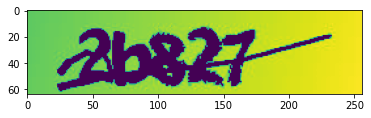

Post Dilation


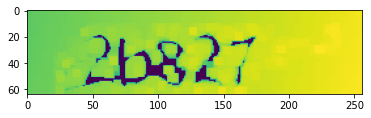

Post Erosion


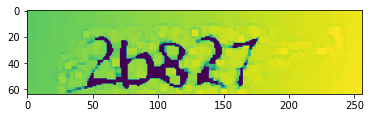

Final


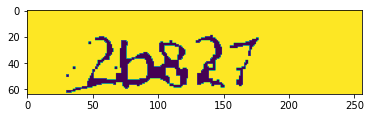

------------------------------------------------------------------------------
Original Image


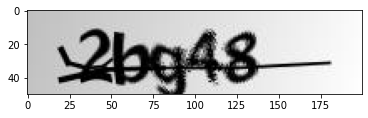

Post thresholding


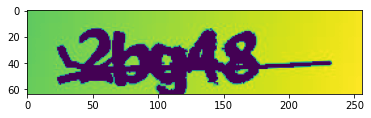

Post Dilation


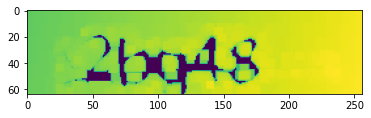

Post Erosion


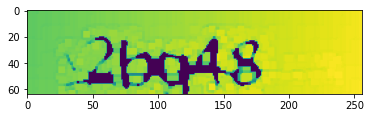

Final


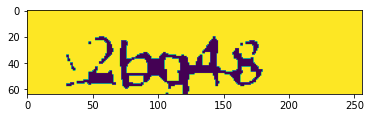

------------------------------------------------------------------------------
Original Image


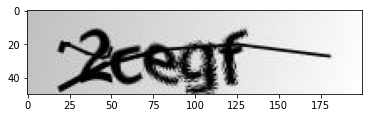

Post thresholding


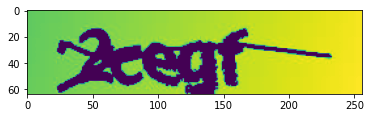

Post Dilation


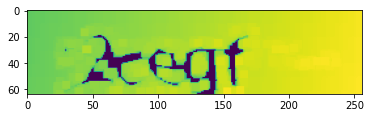

Post Erosion


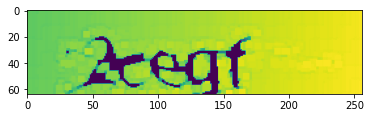

Final


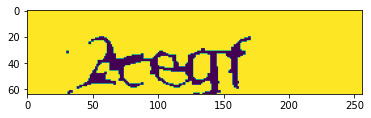

------------------------------------------------------------------------------
Original Image


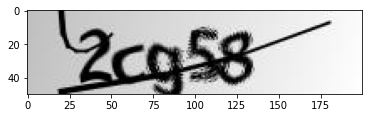

Post thresholding


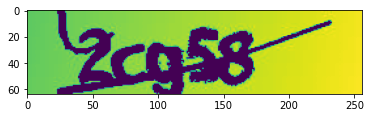

Post Dilation


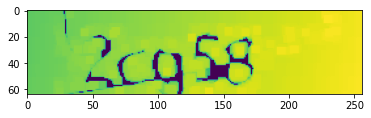

Post Erosion


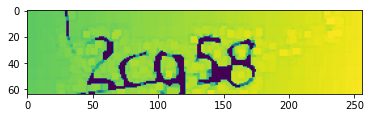

Final


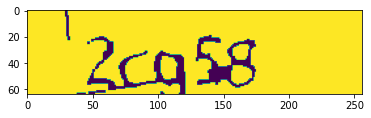

------------------------------------------------------------------------------
Original Image


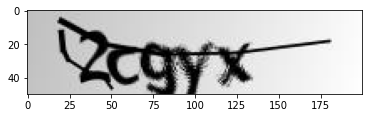

Post thresholding


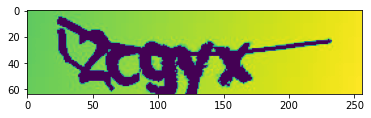

Post Dilation


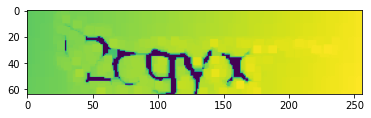

Post Erosion


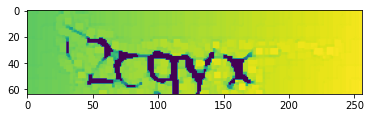

Final


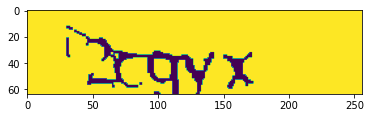

------------------------------------------------------------------------------


In [62]:
images = [r"C:\Users\jaydu\Documents\Durham\Capstone Group 5\Auto Captcha\datasetImages\set1\captcha_images\2b827.png",
          r"C:\Users\jaydu\Documents\Durham\Capstone Group 5\Auto Captcha\datasetImages\set1\captcha_images\2bg48.png",
          r"C:\Users\jaydu\Documents\Durham\Capstone Group 5\Auto Captcha\datasetImages\set1\captcha_images\2cegf.png",
          r"C:\Users\jaydu\Documents\Durham\Capstone Group 5\Auto Captcha\datasetImages\set1\captcha_images\2cg58.png",
          r"C:\Users\jaydu\Documents\Durham\Capstone Group 5\Auto Captcha\datasetImages\set1\captcha_images\2cgyx.png"]
for i in images:
    imgOj = AutoCaptcha(i)
    imgOj.preProcessing()
    print("------------------------------------------------------------------------------")

## After segmentation of image we intend to use individual data for training a Convoluted Neural Network model on the lines of character recognition.